In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from collections import Counter

In [3]:
dataset = pd.read_csv('/Users/rahulkashyap/Downloads/Data Science Content /Learnbay course content/Linear regression/petrol_consumption.csv')

In [4]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
dataset.shape

(48, 5)

In [6]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


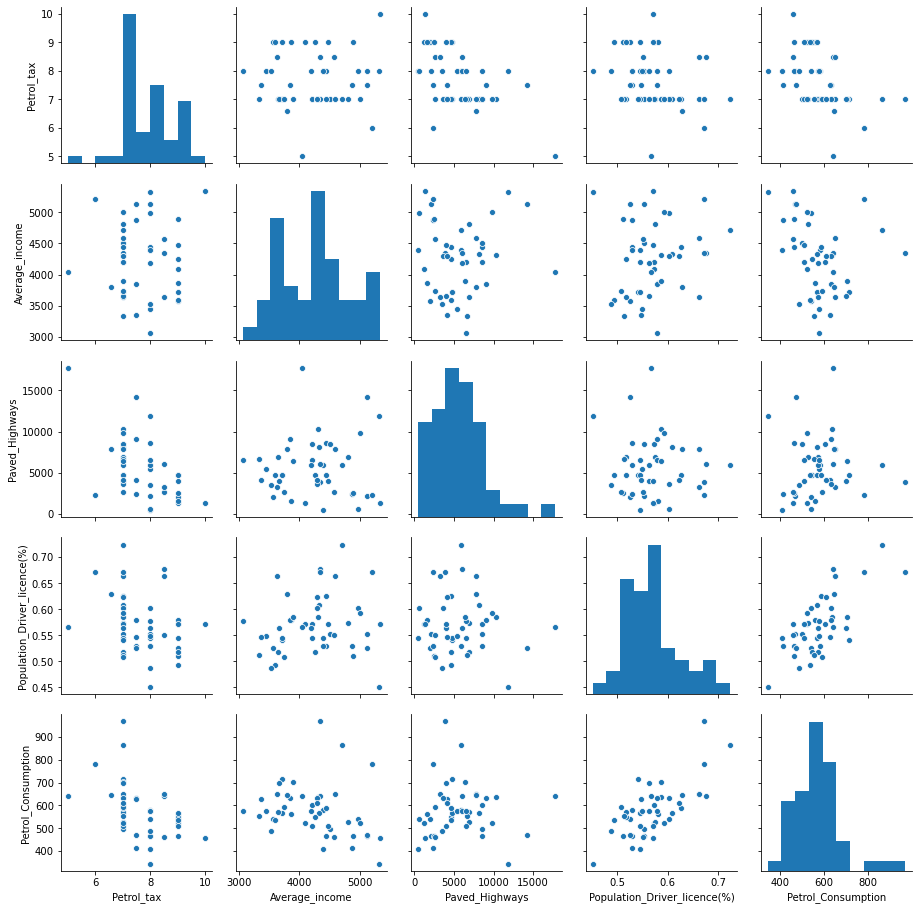

In [7]:
sns.pairplot(dataset)

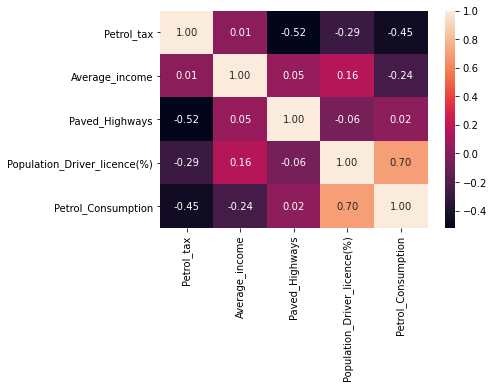

In [8]:
sns.heatmap(dataset.corr(), annot = True , fmt=".2f")
plt.show()

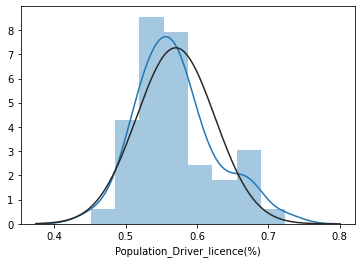

In [9]:
sns.distplot(dataset['Population_Driver_licence(%)'],fit=norm)

In [30]:
X = dataset[['Petrol_tax','Average_income','Population_Driver_licence(%)']]#'Petrol_tax','Paved_Highways'
y = dataset['Petrol_Consumption']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=456)

In [32]:
X_train

,Petrol_tax,Average_income,Population_Driver_licence(%)
44,6.00,5215,0.672
35,6.58,3802,0.629
33,7.50,3357,0.547
38,8.50,3635,0.663
36,5.00,4045,0.566
0,9.00,3571,0.525
23,9.00,4258,0.517
3,7.50,4870,0.529
18,7.00,4716,0.724
12,7.00,4817,0.574


In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-26.223314
Average_income,-0.068393
Population_Driver_licence(%),1514.581518


In [35]:
regressor.intercept_

206.27982750520925

In [17]:
y_pred = regressor.predict(X_train)
y_pred

array([714.41376237, 725.25264461, 609.57068162, 737.23224923,
       651.20539443, 521.84260587, 461.39551517, 481.60949512,
       795.4435716 , 563.17132409, 590.00400972, 498.87475449,
       549.67238766, 600.32227549, 313.39220595, 570.64971381,
       744.12765341, 523.3865842 , 491.63518025, 667.64612375,
       572.39521407, 584.63763393, 710.9647402 , 645.9863999 ,
       494.63121837, 443.53989859, 561.2391224 , 449.53657431,
       588.19056716, 528.09410492, 673.91029251, 612.36227133,
       562.00695032, 644.01307914, 538.10759566, 539.99743285,
       643.7613943 , 620.7773772 ])

In [36]:
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df

,Actual,Predicted
44,782,714.413762
35,644,725.252645
33,628,609.570682
38,648,737.232249
36,640,651.205394
0,541,521.842606
23,547,461.395515
3,414,481.609495
18,865,795.443572
12,525,563.171324


Text(0, 0.5, 'Residuals')

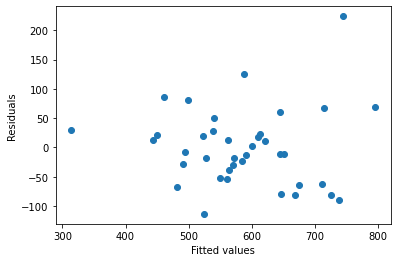

In [37]:
# Validating OLS Assumptions
plt.scatter(y_pred, (y_train-y_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [38]:
(y_train-y_pred).mean()

-4.338050386745875e-14

Text(0.5, 0, 'Residuals')

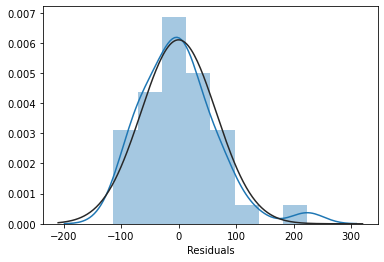

In [39]:
sns.distplot(y_train-y_pred , fit=norm);
plt.xlabel('Residuals')

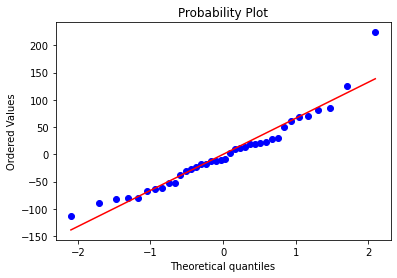

In [40]:
from scipy import stats
stats.probplot(y_train-y_pred, plot=plt)
plt.show()

In [41]:
import statsmodels.api as sm

In [42]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_train)
X_endog1 = sm.add_constant(X_test)

In [46]:
res = sm.OLS(y_train, X_train)
res.fit()

In [47]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Petrol_Consumption   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              924.0
Date:                Sun, 14 Mar 2021   Prob (F-statistic):                    2.28e-33
Time:                        12:50:15   Log-Likelihood:                         -213.47
No. Observations:                  38   AIC:                                      432.9
Df Residuals:                      35   BIC:                                      437.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Petrol_tax                     -16.6652      9.131     -1.825      0.077     -35.202       1.872
Average_income                  -0.0604      0.020     -3.026      0.005      -0.101      -0.020
Population_Driver_licence(%)  1687.9507    146.018     11.560      0.000    1391.518    1984.384
==============================================================================
Omnibus:                        7.503   Durbin-Watson:                   2.440
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.234
Skew:                           0.800   Prob(JB):                       0.0443
Kurtosis:                       4.174   Cond. No.                     5.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Model evaluation metrics - Regression problems

y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


Mean Absolute Error: 50.49937571025755
Mean Squared Error: 3027.549537918941
Root Mean Squared Error: 55.023172735847766


In [49]:
# Model evaluation metrics - Regression problems

y_pred1 = res.fit().predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


Mean Absolute Error: 59.32972677688739
Mean Squared Error: 4041.738612134655
Root Mean Squared Error: 63.57466957943749


In [25]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [52]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_test, y_pred1))


Mean Absolute percentage error: 10.660888785576446


In [51]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_train, y_pred))


Mean Absolute percentage error: 8.605922681158146


In [ ]:
# Build a model keeping in mind the individual t tests

In [28]:
# Model evaluation metrics - Regression problems

y_pred = regressor.predict(X_train)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


Mean Absolute Error: 49.649311174804964
Mean Squared Error: 4277.041333972722
Root Mean Squared Error: 65.39909276108287


In [50]:
# Model evaluation metrics - Regression problems

y_pred = res.fit().predict(X_train)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 51.15854202200522
Mean Squared Error: 4436.433635464877
Root Mean Squared Error: 66.60655850188385
